# Greetings!!!
- My project is about Hit Bollywood movies from 1990 to 2019 {Three Decades}
- We will be discussing what does the Indian Audience want and is well recieved, analysing Genre, Directors, Production house, ACtors, profit made and budget of the movies.
- I am going to webscrape data through beautiful soup and selenium. Using pandas save it in Data Frame. Use basic analysis and then plot using matplot and seaborn.

## Importing required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

## Scraping data from website using Beautiful Soup

In [2]:
r1 = requests.get("https://www.boxofficeindia.com/hit-down.php?txtYearlyData=1990-1999")
r2 = requests.get("https://www.boxofficeindia.com/hit-down.php?txtYearlyData=2000-2009")
r3 = requests.get("https://www.boxofficeindia.com/hit-down.php?txtYearlyData=2010-2019")

In [3]:
soup1 = BeautifulSoup(r1.text, 'html.parser')
soup2 = BeautifulSoup(r2.text, 'html.parser')
soup3 = BeautifulSoup(r3.text, 'html.parser')

In [4]:
results1 = soup1.find_all('tr', {'class':'grayrow boi-listing-rows'})
results2 = soup2.find_all('tr', {'class':'grayrow boi-listing-rows'})
results3 = soup3.find_all('tr', {'class':'grayrow boi-listing-rows'})

In [8]:
len(results1)

100

In [9]:
len(results2)

100

In [10]:
len(results3)

100

In [11]:
data = []

In [13]:
for i in results1:
    name = i.find('td', {'style':'text-align:left;'}).text.strip()
    date = i.contents[5].text.strip()
    type = i.contents[7].text.strip()
    value = i.contents[9].text.strip()
    
    data.append([name,date,type,value])

In [15]:
for i in results2:
    name = i.find('td', {'style':'text-align:left;'}).text.strip()
    date = i.contents[5].text.strip()
    type = i.contents[7].text.strip()
    value = i.contents[9].text.strip()
    
    data.append([name,date,type,value])

In [18]:
for i in results3:
    name = i.find('td', {'style':'text-align:left;'}).text.strip()
    date = i.contents[5].text.strip()
    type = i.contents[7].text.strip()
    value = i.contents[9].text.strip()
    
    data.append([name,date,type,value])

In [20]:
len(data)

300

In [21]:
url_list=[]

In [22]:
for i in results1:
    url = 'https://www.boxofficeindia.com/' + i.find('a')['href']
    url_list.append(url)

In [23]:
for i in results2:
    url = 'https://www.boxofficeindia.com/' + i.find('a')['href']
    url_list.append(url)

In [24]:
for i in results3:
    url = 'https://www.boxofficeindia.com/' + i.find('a')['href']
    url_list.append(url)

In [25]:
len(url_list)

300

## Scraping Data using Selenium

In [26]:
path = "C:\\Users\\Faizan\\Regex and webSccraping\\chromedriver.exe"
driver = webdriver.Chrome(path)

In [27]:
data1 = []

In [29]:
for i in url_list:
    try:
        driver.get(i)
        y = driver.find_element_by_class_name('latestreslim')
        l = y.text.split('\n')
        name = l[1]
        l1 = l[2].split('|')
        genre = l1[2].strip()[6:].strip()
        runtime = l1[1].strip()[8:].strip()
        rating = l[10][7:].strip()
        budget = l[13][7:].strip()
        production = l[24][18:].strip()
        actor = l[25:29]
        director = l[29][8:].strip()
    except:
        try:
            driver.refresh()
            driver.get(i)
            y = driver.find_element_by_class_name('latestreslim')
            l = y.text.split('\n')
            name = l[1]
            l1 = l[2].split('|')
            genre = l1[2].strip()[6:].strip()
            runtime = l1[1].strip()[8:].strip()
            rating = l[10][7:].strip()
            budget = l[13][7:].strip()
            production = l[24][18:].strip()
            actor = l[25:29]
            director = l[29][8:].strip()
        except:
            pass
    data1.append([name,genre,runtime,rating,budget,production,actor,director])
    
driver.close()


In [30]:
len(data1)

300

In [46]:
final_data=[]

In [47]:
for i in range(300):
    final_data.append(data[i]+data1[i])

In [48]:
for i in range(300):
    del final_data[i][4]

## Final Data in the desired format

In [49]:
final_data

[['Hum Aapke Hain Koun..!',
  '05 Aug 1994',
  'All Time Blockbuster',
  '7,11,29,25,540',
  'Drama',
  '206 min',
  '75.05% (211 Ratings)',
  '6,25,00,000',
  'Rajshri Productions Pvt. Ltd.',
  ['Madhuri Dixit', 'Salman Khan', 'Mohnish Bahl', 'Renuka Shahane'],
  'Sooraj Barjatya'],
 ['Dilwale Dulhania Le Jayenge',
  '20 Oct 1995',
  'All Time Blockbuster',
  '4,61,33,71,070',
  'Love Story',
  '189 min',
  '78.33% (87 Ratings)',
  '4,00,00,000',
  'Yash Raj Films',
  ['Shahrukh Khan', 'Kajol', 'Amrish Puri', 'Farida Jalal'],
  'Aditya Chopra'],
 ['Raja Hindustani',
  '11 Nov 1996',
  'All Time Blockbuster',
  '3,94,05,65,750',
  'Love Story',
  '171 min',
  '57.12% (85 Ratings)',
  '5,75,00,000',
  'Cineyug Films Pvt. Ltd.',
  ['Aamir Khan', 'Karisma Kapoor', 'Suresh Oberoi', 'Johny Lever'],
  'Dharmesh Darshan'],
 ['Border',
  '13 Jun 1997',
  'All Time Blockbuster',
  '3,56,62,72,110',
  'Action',
  '176 min',
  '65.56% (36 Ratings)',
  '10,00,00,000',
  'J.P. Films',
  ['Rakhee', 

## Using Pandas saving our data as Data Frame object

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.DataFrame(final_data,columns=['Movie Name','Release Date','Verdict','Adjusted Net Gross','Genre','Runtime','Ratings','Budget','Production Banner','Actors','Director'])

In [53]:
df.head()

,Movie Name,Release Date,Verdict,Adjusted Net Gross,Genre,Runtime,Ratings,Budget,Production Banner,Actors,Director
0,Hum Aapke Hain Koun..!,05 Aug 1994,All Time Blockbuster,"7,11,29,25,540",Drama,206 min,75.05% (211 Ratings),"6,25,00,000",Rajshri Productions Pvt. Ltd.,"[Madhuri Dixit, Salman Khan, Mohnish Bahl, Ren...",Sooraj Barjatya
1,Dilwale Dulhania Le Jayenge,20 Oct 1995,All Time Blockbuster,"4,61,33,71,070",Love Story,189 min,78.33% (87 Ratings),"4,00,00,000",Yash Raj Films,"[Shahrukh Khan, Kajol, Amrish Puri, Farida Jalal]",Aditya Chopra
2,Raja Hindustani,11 Nov 1996,All Time Blockbuster,"3,94,05,65,750",Love Story,171 min,57.12% (85 Ratings),"5,75,00,000",Cineyug Films Pvt. Ltd.,"[Aamir Khan, Karisma Kapoor, Suresh Oberoi, Jo...",Dharmesh Darshan
3,Border,13 Jun 1997,All Time Blockbuster,"3,56,62,72,110",Action,176 min,65.56% (36 Ratings),"10,00,00,000",J.P. Films,"[Rakhee, Sunny Deol, Jackie Shroff, Suneil She...",J.P. Dutta
4,Kuch Kuch Hota Hai,16 Oct 1998,All Time Blockbuster,"3,42,92,29,860",Love Story,185 min,70.80% (224 Ratings),"10,00,00,000",Dharma Productions Pvt. Ltd.,"[Shahrukh Khan, Kajol, Rani Mukherjee, Farida ...",Karan Johar


## Cleansing Data and changing formats for operations

In [6]:
df['Adjusted Net Gross'] = df['Adjusted Net Gross'].str.replace(',','')

In [7]:
df['Budget'] = df['Budget'].str.replace(',','')

In [8]:
df['Adjusted Net Gross'] = df['Adjusted Net Gross'].astype(str).astype(float)

In [9]:
df['Budget'] = df['Budget'].astype(str).astype(float)

In [10]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [32]:
df['Verdict'] = df['Verdict'].astype(str)

In [33]:
df['Director'] = df['Director'].astype(str)

## Using Pandas to save our Data Frame Object as .csv file

In [58]:
df.to_csv('Bolywood_Movies.csv',index = False)

In [59]:
df = pd.read_csv('Bolywood_Movies.csv')
df.head()

,Movie Name,Release Date,Verdict,Adjusted Net Gross,Genre,Runtime,Ratings,Budget,Production Banner,Actors,Director
0,Hum Aapke Hain Koun..!,1994-08-05,All Time Blockbuster,7.112926e+09,Drama,206 min,75.05% (211 Ratings),62500000.0,Rajshri Productions Pvt. Ltd.,"['Madhuri Dixit', 'Salman Khan', 'Mohnish Bahl...",Sooraj Barjatya
1,Dilwale Dulhania Le Jayenge,1995-10-20,All Time Blockbuster,4.613371e+09,Love Story,189 min,78.33% (87 Ratings),40000000.0,Yash Raj Films,"['Shahrukh Khan', 'Kajol', 'Amrish Puri', 'Far...",Aditya Chopra
2,Raja Hindustani,1996-11-11,All Time Blockbuster,3.940566e+09,Love Story,171 min,57.12% (85 Ratings),57500000.0,Cineyug Films Pvt. Ltd.,"['Aamir Khan', 'Karisma Kapoor', 'Suresh Obero...",Dharmesh Darshan
3,Border,1997-06-13,All Time Blockbuster,3.566272e+09,Action,176 min,65.56% (36 Ratings),100000000.0,J.P. Films,"['Rakhee', 'Sunny Deol', 'Jackie Shroff', 'Sun...",J.P. Dutta
4,Kuch Kuch Hota Hai,1998-10-16,All Time Blockbuster,3.429230e+09,Love Story,185 min,70.80% (224 Ratings),100000000.0,Dharma Productions Pvt. Ltd.,"['Shahrukh Khan', 'Kajol', 'Rani Mukherjee', '...",Karan Johar


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Name          300 non-null    object 
 1   Release Date        300 non-null    object 
 2   Verdict             300 non-null    object 
 3   Adjusted Net Gross  300 non-null    float64
 4   Genre               300 non-null    object 
 5   Runtime             300 non-null    object 
 6   Ratings             300 non-null    object 
 7   Budget              300 non-null    float64
 8   Production Banner   300 non-null    object 
 9   Actors              300 non-null    object 
 10  Director            299 non-null    object 
dtypes: float64(2), object(9)
memory usage: 25.9+ KB


## Using Describe method

In [56]:
df.describe()

,Adjusted Net Gross,Budget
count,3.000000e+02,3.000000e+02
mean,1.304121e+09,3.693967e+08
std,8.447800e+08,5.514169e+08
min,6.654964e+07,2.500000e+06
25%,7.838738e+08,6.187500e+07
50%,1.116918e+09,1.500000e+08
75%,1.545236e+09,4.425000e+08
max,7.112926e+09,5.750000e+09


## Analysis to understand Genre against Budget and Adjusted Net Gross

## Number of hits given by Directors

In [39]:
df.Director.value_counts()

David Dhawan                17
Rohit Shetty                 9
Priyadarshan                 7
Raj Kanwar                   7
Indra Kumar                  7
Karan Johar                  6
Rakesh Roshan                6
Anees Bazmee                 5
Sanjay Leela Bhansali        5
Abbas - Mustan               5
Ram Gopal Verma              5
Sooraj Barjatya              4
Siddharth Anand              4
Sajid Khan                   4
Satish Kaushik               4
Rajkumar Hirani              4
Rajkumar Santoshi            4
Mohit Suri                   4
Vikram Bhatt                 4
Yash Chopra                  4
Milan Luthria                4
Anurag Basu                  3
Aditya Chopra                3
Ali Abbas Zafar              3
Farah Khan                   3
Sanjay Gadhvi                3
Kabir Khan                   3
Sangeeth Sivan               2
Harry Baweja                 2
Ashutosh Gowariker           2
A.R. Murugadoss              2
Rakesh Omprakash Mehra       2
Aziz Mir

## Number of hits given by Production House

In [40]:
df['Production Banner'].value_counts()

Yash Raj Films                                                                                                                    24
Dharma Productions Pvt. Ltd.                                                                                                       7
Filmkraft Pvt. Ltd.                                                                                                                6
Tips Industries Pvt. Ltd.                                                                                                          5
Vishesh Films Pvt. Ltd.                                                                                                            5
Shree Ashtavinayak Cinevision Ltd.                                                                                                 4
Mukta Arts                                                                                                                         4
S.K. Films Enterprises                                               

## Using groupby() method to get all the hit movies by David Dhavan 

In [41]:
dr = df.groupby('Director')

In [43]:
pd.set_option("display.max_rows", None)
dr.get_group('David Dhawan')

,Movie Name,Release Date,Verdict,Adjusted Net Gross,Genre,Runtime,Ratings,Budget,Production Banner,Actors,Director
17,Biwi No.1,1999-05-28,Super Hit,1.898684e+09,Comedy,158 min,69.43% (35 Ratings),120000000.0,Puja Entertainment Ltd.,"['Anil Kapoor', 'Salman Khan', 'Karisma Kapoor...",David Dhawan
20,Hero No. 1,1997-02-21,Super Hit,1.676051e+09,Comedy,137 min,75.71% (7 Ratings),67500000.0,Puja Entertainment Ltd.,"['Govinda', 'Karisma Kapoor', 'Kader Khan', 'P...",David Dhawan
25,Raja Babu,1994-01-21,Super Hit,1.515062e+09,Masala,150 min,73.00% (5 Ratings),23000000.0,Sapna Arts,"['Govinda', 'Karisma Kapoor', 'Shakti Kapoor',...",David Dhawan
27,Saajan Chale Sasural,1996-04-12,Super Hit,1.498136e+09,Masala,133 min,51.25% (4 Ratings),42500000.0,Anas Films Pvt. Ltd.,"['Govinda', 'Karisma Kapoor', 'Tabu', 'Kader K...",David Dhawan
28,Coolie No. 1,1995-06-30,Super Hit,1.428894e+09,Masala,139 min,46.25% (4 Ratings),35000000.0,Puja Entertainment Ltd.,"['Govinda', 'Karisma Kapoor', 'Harish', 'Kanch...",David Dhawan
36,Bade Miyan Chote Miyan,1998-10-16,Hit,1.569206e+09,Masala,144 min,63.57% (7 Ratings),120000000.0,Epic Enterprises,"['Amitabh Bachchan', 'Govinda', 'Raveena Tando...",David Dhawan
38,Judwaa,1997-02-07,Hit,1.311182e+09,Masala,139 min,66.90% (21 Ratings),62500000.0,Nadiadwala Grandson Entertainment,"['Salman Khan', 'Karisma Kapoor', 'Rambha', 'K...",David Dhawan
41,Deewana Mastana,1997-10-10,Hit,1.162118e+09,Comedy,139 min,86.67% (3 Ratings),70000000.0,M.K.D. Films,"['Anil Kapoor', 'Govinda', 'Juhi Chawla', 'Joh...",David Dhawan
45,Haseena Maan Jayegi,1999-06-25,Hit,1.092203e+09,Comedy,147 min,45.00% (4 Ratings),90000000.0,Rahul Productions,"['Sanjay Dutt', 'Govinda', 'Karisma Kapoor', '...",David Dhawan
71,Mr. & Mrs. Khiladi,1997-10-10,Semi Hit,8.188876e+08,Comedy,142 min,80.71% (7 Ratings),57500000.0,DMS Films Pvt. Ltd.,"['Akshay Kumar', 'Juhi Chawla', 'Kader Khan', ...",David Dhawan


## Using groupby() method to get all the hit movies by Yash Raj Films 

In [44]:
pb = df.groupby('Production Banner')

In [46]:
pd.set_option("display.max_rows", None)
pb.get_group('Yash Raj Films')

,Movie Name,Release Date,Verdict,Adjusted Net Gross,Genre,Runtime,Ratings,Budget,Production Banner,Actors,Director
1,Dilwale Dulhania Le Jayenge,1995-10-20,All Time Blockbuster,4.613371e+09,Love Story,189 min,78.33% (87 Ratings),4.000000e+07,Yash Raj Films,"['Shahrukh Khan', 'Kajol', 'Amrish Puri', 'Far...",Aditya Chopra
6,Dil To Pagal Hai,1997-10-31,Blockbuster,2.838169e+09,Love Story,175 min,57.48% (206 Ratings),9.000000e+07,Yash Raj Films,"['Madhuri Dixit', 'Shahrukh Khan', 'Karisma Ka...",Yash Chopra
10,Darr,1993-12-24,Blockbuster,1.914360e+09,Thriller,177 min,62.14% (7 Ratings),3.250000e+07,Yash Raj Films,"['Sunny Deol', 'Juhi Chawla', 'Shahrukh Khan',...",Yash Chopra
104,Mohabbatein,2000-10-27,Blockbuster,2.569951e+09,Love Story,216 min,58.92% (199 Ratings),1.900000e+08,Yash Raj Films,"['Amitabh Bachchan', 'Shahrukh Khan', 'Aishwar...",Aditya Chopra
106,Dhoom 2,2006-11-24,Blockbuster,2.073137e+09,Action,152 min,50.00% (124 Ratings),4.200000e+08,Yash Raj Films,"['Hrithik Roshan', 'Abhishek Bachchan', 'Aishw...",Sanjay Gadhvi
110,Rab Ne Bana Di Jodi,2008-12-12,Blockbuster,1.658259e+09,Love Story,166 min,58.12% (213 Ratings),3.900000e+08,Yash Raj Films,"['Shahrukh Khan', 'Anushka Sharma', 'Vinay Pat...",Aditya Chopra
117,Chak De India,2007-08-10,Super Hit,1.344745e+09,Drama,152 min,70.55% (208 Ratings),2.200000e+08,Yash Raj Films,"['Shahrukh Khan', 'Vidya Mallavde', 'Tanya Abr...",Shimit Amin
118,Fanaa,2006-05-26,Super Hit,1.341283e+09,Love Story,168 min,64.53% (32 Ratings),3.000000e+08,Yash Raj Films,"['Aamir Khan', 'Kajol', 'Rishi Kapoor', 'Tabu']",Kunal Kohli
119,Veer Zaara,2004-11-12,Super Hit,1.284158e+09,Love Story,192 min,55.59% (178 Ratings),2.300000e+08,Yash Raj Films,"['Shahrukh Khan', 'Preity Zinta', 'Rani Mukher...",Yash Chopra
123,Bunty Aur Babli,2005-05-27,Super Hit,1.083163e+09,Comedy,164 min,82.00% (5 Ratings),1.250000e+08,Yash Raj Films,"['Amitabh Bachchan', 'Abhishek Bachchan', 'Ran...",Shaad Ali


## Using ast module[abstract syntax tree] to convert strings to list and then count the hits given by each actor.

In [52]:
import ast

In [54]:
actors = df["Actors"].apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts()
actors

Akshay Kumar                                                                                                                                                                                                                                                                                                                        34
Shahrukh Khan                                                                                                                                                                                                                                                                                                                       30
Salman Khan                                                                                                                                                                                                                                                                                                                         29
Ajay Devgn         

In [73]:
df.Genre.value_counts()

Drama               69
Action              67
Comedy              57
Love Story          46
Masala              24
Thriller            16
Rom - Com           12
Horror               6
Sci Fi / Fantasy     2
Mystery              1
Name: Genre, dtype: int64

In [62]:
dr = df.groupby('Genre')

In [65]:
dr.Budget.max()

Genre
Action              3.250000e+09
Comedy              1.620000e+09
Drama               2.150000e+09
Horror              3.100000e+08
Love Story          9.800000e+08
Masala              1.950000e+09
Mystery             1.900000e+08
Rom - Com           5.600000e+08
Sci Fi / Fantasy    5.750000e+09
Thriller            8.600000e+08
Name: Budget, dtype: float64

In [90]:
df.groupby('Director').mean()['Adjusted Net Gross']

Director
A.R. Murugadoss        1.826845e+09
Aamir Khan             1.200682e+09
Abbas - Mustan         1.107936e+09
Abbas Tyrewala         9.055367e+08
Abhinav Kashyap        2.412521e+09
                           ...     
Vikas Bahl             1.470000e+09
Vikram Bhatt           8.955591e+08
Vipul Amrutlal Shah    8.738968e+08
Yash Chopra            1.816002e+09
Zoya Akhtar            1.224755e+09
Name: Adjusted Net Gross, Length: 154, dtype: float64

## Plotting graphs to understand the budget and profit made by different genre movies

<AxesSubplot:xlabel='Genre'>

<Figure size 864x576 with 0 Axes>

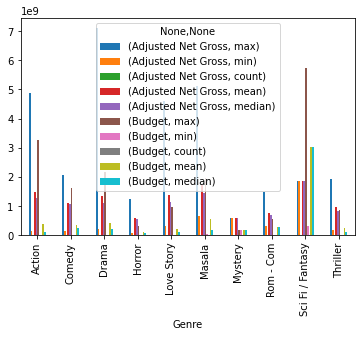

In [92]:
plt.figure(figsize=(12,8))
df.groupby('Genre').agg(['max','min','count','mean','median']).plot(kind='bar')

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Adjusted Net Gross'>

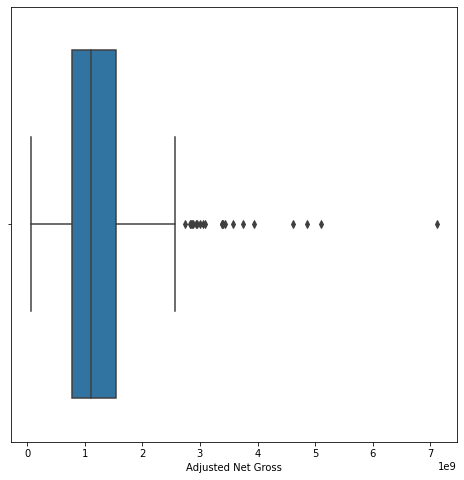

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Adjusted Net Gross')

<AxesSubplot:xlabel='Adjusted Net Gross', ylabel='Genre'>

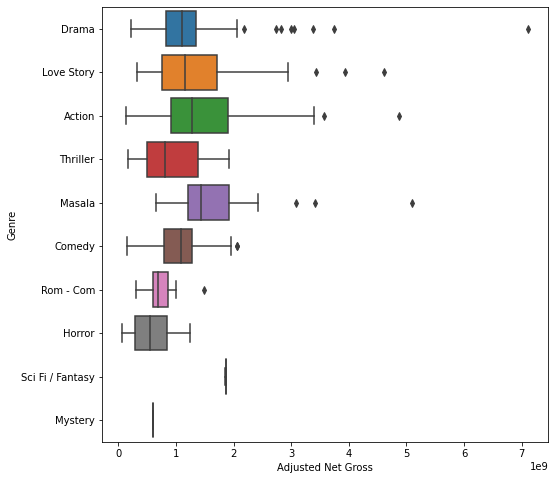

In [59]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Adjusted Net Gross', y='Genre')

<AxesSubplot:xlabel='Budget', ylabel='Genre'>

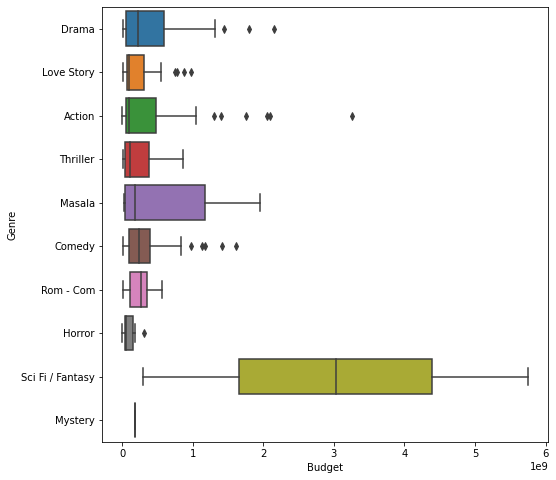

In [63]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='Budget', y='Genre')

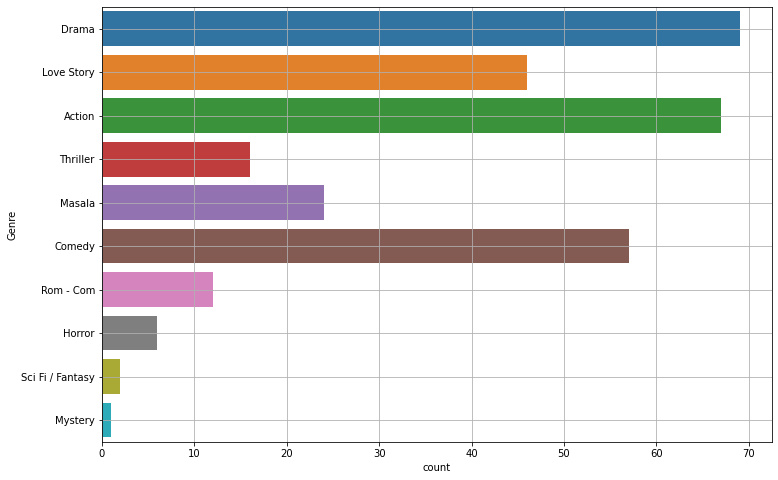

In [64]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='Genre')
plt.grid(True)

## Conclusion

- Movies are majorly from Drama, Action and Comedy respectively
- Movies are hardly from Mystery, Sci-fi and Horror
- The Highest budget was for a Sci-Fi movie
- The best profit making movies are from Action genre
- Director with highest number of hits are from David Dhavan which is 17 followed by Rohit Shetty with 9 and Priyadarshan with 7
- Production house with highest number of hits are from Yash Raj Films which is 24 followed by Dharma Productions Pvt. Ltd. with 7 and Filmkraft Pvt. Ltd. with 6
- Actor with highest number of hits are from Akshay Kumar which is 34 followed by Shahrukh Khan with 30, Salman Khan with 29 and Ajay Devgn with 27
- Actress with highest number of hits are from Karisma Kapoor which is 20 followed by Katrina Kaif with 14 and Kareena Kapoor with 13.

## Result

As per the analysed data from the past 30 years in India, we conclude that movies from Drama, Love story, Action and Comedy are well recieved by the Indian Audience. The chances of a movie being a hit is high if it is made with Production House : Yash Raj Films, Dharma Productions Pvt. Ltd. & Filmkraft Pvt. Ltd. ; Directors : David Dhavan, Rohit Shetty & Priyadarshan ; Lead Actor : Akshay Kumar, Shahrukh Khan, Salman Khan & Ajay Devgan ; Lead Actress : Karisma Kapoor, Katrina Kaif & Kareena Kapoor.

- Note : The result and conclusion is purely from the data analysis, not considering aging and timely fading of the stars and director